In [104]:
import numpy as np 
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
from google.colab import drive
import os

#mount your Google drive into this notebook
drive.mount('/content/gdrive')
#find the path to your Google drive root
os.getcwd()+"/gdrive/My Drive"
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Data Mining/HW4')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


          x0        x1
1  -6.912185  3.800000
2  -6.988086  4.000000
3  -9.922216 -4.982732
4  -8.956574 -4.414626
5  -7.976215 -3.982776
6  -6.905073 -3.465091
7  -5.905722 -2.906714
8  -4.941179 -1.909161
9  -4.242302 -1.438373
10 -3.453954 -0.965268
11  4.914562  2.819403
12  4.930183  2.115149
13  5.074050  2.876634
14  4.147040  2.563205
15  0.125050 -1.803508
16  0.102808 -1.997527
17  5.000000 -3.000000
18  0.000000  5.001018
19  3.005828  5.007149


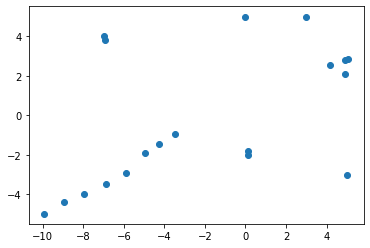

In [14]:
c1 = pd.read_csv("C1.txt", delim_whitespace=True, names=['x0', 'x1'])
print (c1)
plt.scatter(c1['x0'],c1['x1'])

In [81]:
#trying to understand algo
  clusters=[]
  for index, row in c1[:5].iterrows():
    clusters.append([[row['x0'], row['x1']]])
  print (clusters)
  while len(clusters) > 3:
    closest_distance=clust_1=clust_2 = math.inf
    for cluster_id, cluster in enumerate(clusters): # loop through each clusters
      #print('cluster_id',cluster_id, cluster)
      for point_id, point in enumerate(cluster): #loop through each point in a cluster
        print('point_id',point_id, point,'%%%%%')
        for cluster2_id, cluster2 in enumerate(clusters[cluster_id+1:]): #loop through each next clusters to compare with the current
          #print('cluster2_id', cluster2_id, cluster2)
          for point2_id, point2 in enumerate(cluster2):
            print('point2_id',point2_id, point2)
            print(distance.euclidean(point,point2), closest_distance, distance.euclidean(point,point2) < closest_distance)
            if distance.euclidean(point,point2) < closest_distance: 
              closest_distance = distance.euclidean(point, point2)
              clust_1 = cluster_id
              clust_2 = cluster2_id+cluster_id+1
              print(clust_1)
              print(clust_2)
    #print('first cluster | ','second cluster | ', 'distance')          
    #print(clust_1,' | ',clust_2, ' | ',closest_distance)
    print(clusters[clust_1])
    print(clusters[clust_2])          
    clusters[clust_1].extend(clusters[clust_2])
    print('end of loop',clusters)          
    clusters.pop(clust_2)
    print('end of loop pop',clusters) 
    print('length of cluster',len(clusters))


  #colors = ['blue', 'red', 'purple', 'teal']
  #for cluster_index, cluster in enumerate(clusters):
  #    for point_index, point in enumerate(cluster):
  #        plt.plot([point[0]], [point[1]], marker='o', markersize=4, color=colors[cluster_index])

[[[-6.912185242808558, 3.8]], [[-6.988086178040582, 4.0]], [[-9.922216335879318, -4.9827324347530135]], [[-8.956573548749036, -4.414625505242606]], [[-7.976214885543187, -3.9827760757713566]]]
point_id 0 [-6.912185242808558, 3.8] %%%%%
point2_id 0 [-6.988086178040582, 4.0]
0.21391809640396484 inf True
0
1
point2_id 0 [-9.922216335879318, -4.9827324347530135]
9.284216509846987 0.21391809640396484 False
point2_id 0 [-8.956573548749036, -4.414625505242606]
8.465199096113954 0.21391809640396484 False
point2_id 0 [-7.976214885543187, -3.9827760757713566]
7.855174251804792 0.21391809640396484 False
point_id 0 [-6.988086178040582, 4.0] %%%%%
point2_id 0 [-9.922216335879318, -4.9827324347530135]
9.4497937425905 0.21391809640396484 False
point2_id 0 [-8.956573548749036, -4.414625505242606]
8.641809123217087 0.21391809640396484 False
point2_id 0 [-7.976214885543187, -3.9827760757713566]
8.043700157172587 0.21391809640396484 False
point_id 0 [-9.922216335879318, -4.9827324347530135] %%%%%
point2_

first cluster |  second cluster |  distance
10  |  12  |  0.16944488242854633
first cluster |  second cluster |  distance
13  |  14  |  0.19528929532997621
first cluster |  second cluster |  distance
0  |  1  |  0.21391809640396484
first cluster |  second cluster |  distance
9  |  10  |  0.7044274570741265
first cluster |  second cluster |  distance
9  |  10  |  0.8091530719434338
first cluster |  second cluster |  distance
6  |  7  |  0.8426573444474812
first cluster |  second cluster |  distance
6  |  7  |  0.9194131222054369
first cluster |  second cluster |  distance
2  |  3  |  1.0712595569036494
first cluster |  second cluster |  distance
1  |  2  |  1.1203622073662078
first cluster |  second cluster |  distance
2  |  3  |  1.1447658914304835
first cluster |  second cluster |  distance
1  |  2  |  1.1896814692761608
first cluster |  second cluster |  distance
1  |  2  |  1.387606917151757
first cluster |  second cluster |  distance
2  |  6  |  2.69726307540558
first cluster |  se

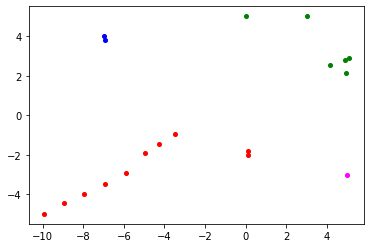

In [102]:
  clusters=[]
  for index, row in c1.iterrows():
    clusters.append([[row['x0'], row['x1']]])
  while len(clusters) > 4: #stop when we have 4 clusters
    closest_distance=clust_1=clust_2 = math.inf
    for cluster_id, cluster in enumerate(clusters): # loop through each clusters
      for point_id, point in enumerate(cluster): #loop through each point in a cluster
        for cluster2_id, cluster2 in enumerate(clusters[cluster_id+1:]): #loop through each next clusters to compare with the current
          for point2_id, point2 in enumerate(cluster2):
            if distance.euclidean(point,point2) < closest_distance: #compare distance between 2 points
              closest_distance = distance.euclidean(point, point2)
              clust_1 = cluster_id #to figure what cluster to merge with
              clust_2 = cluster2_id+cluster_id+1 #this will be merged with clust_1 then removed at the end
    print('first cluster | ','second cluster | ', 'distance')          
    print(clust_1,' | ',clust_2, ' | ',closest_distance)         
    clusters[clust_1].extend(clusters[clust_2])         
    clusters.pop(clust_2)
  
  for i in clusters:
    print(np.around(i,2))
  
  colors = ['blue', 'red', 'green', 'magenta']
  for cluster_index, cluster in enumerate(clusters):
      for point_index, point in enumerate(cluster):
          plt.plot([point[0]], [point[1]], marker='o', markersize=4, color=colors[cluster_index])

In [111]:
X = c1.as_matrix()
# generate the linkage matrix
single_link = linkage(X, 'single') # using single link metric to evaluate 'distance' between clusters
c, coph_dists = cophenet(single_link, pdist(X))
c
print(single_link)

[[10.    12.     0.169  2.   ]
 [14.    15.     0.195  2.   ]
 [ 0.     1.     0.214  2.   ]
 [11.    19.     0.704  3.   ]
 [13.    22.     0.809  4.   ]
 [ 7.     8.     0.843  2.   ]
 [ 9.    24.     0.919  3.   ]
 [ 3.     4.     1.071  2.   ]
 [ 2.    26.     1.12   3.   ]
 [ 5.     6.     1.145  2.   ]
 [27.    28.     1.19   5.   ]
 [25.    29.     1.388  8.   ]
 [18.    23.     2.697  5.   ]
 [17.    31.     3.006  6.   ]
 [20.    30.     3.676 10.   ]
 [16.    33.     4.999 11.   ]
 [32.    34.     5.116 17.   ]
 [21.    35.     5.88  19.   ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


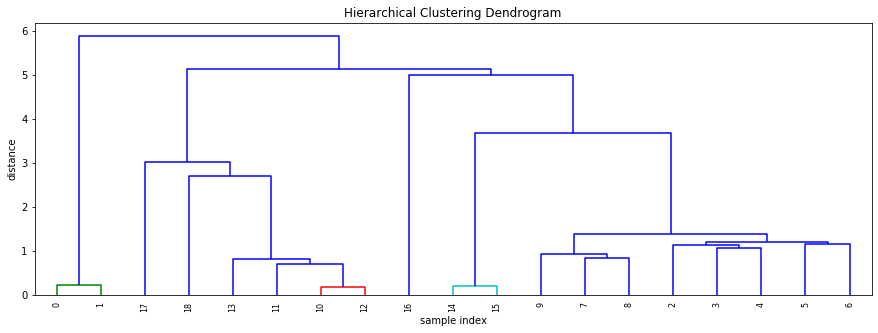

In [112]:
# calculate full dendrogram
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    single_link,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold= .6
)
plt.show()

In [131]:
assignments = fcluster(single_link,4,'distance')
print(assignments)
print(np.array(c1))
#cluster_output = pd.DataFrame({'point': np.array(c1),"cluster_group": assignments})
#print(cluster_output)

[1 1 3 3 3 3 3 3 3 3 2 2 2 2 3 3 4 2 2]
[[-6.912  3.8  ]
 [-6.988  4.   ]
 [-9.922 -4.983]
 [-8.957 -4.415]
 [-7.976 -3.983]
 [-6.905 -3.465]
 [-5.906 -2.907]
 [-4.941 -1.909]
 [-4.242 -1.438]
 [-3.454 -0.965]
 [ 4.915  2.819]
 [ 4.93   2.115]
 [ 5.074  2.877]
 [ 4.147  2.563]
 [ 0.125 -1.804]
 [ 0.103 -1.998]
 [ 5.    -3.   ]
 [ 0.     5.001]
 [ 3.006  5.007]]
